In [6]:
import pandas as pd

In [7]:
weather = pd.read_csv('weather.csv', index_col="DATE")

In [8]:
weather

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT08
DATE,,,,,,,,,,,,,,,,,,,
2022-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,NaN,1.22,0.0,0.0,50,53,48,190,200,15.0,18.1,1.0,1.0,NaN,NaN,NaN
2022-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,NaN,0.03,0.0,0.0,53,59,38,330,320,23.9,30.0,1.0,1.0,NaN,NaN,NaN
2022-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,NaN,0.00,0.0,0.0,34,39,22,350,360,30.0,36.9,NaN,NaN,NaN,NaN,NaN
2022-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,NaN,0.00,0.0,0.0,25,33,19,330,330,21.9,25.9,NaN,NaN,NaN,NaN,NaN
2022-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,NaN,0.29,0.0,0.0,36,46,30,250,230,16.1,19.9,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2.91,NaN,0.00,0.0,0.0,51,62,38,160,210,8.9,11.0,1.0,NaN,NaN,NaN,NaN
2022-10-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,NaN,0.08,0.0,0.0,56,64,49,190,190,13.0,15.0,1.0,NaN,NaN,NaN,NaN
2022-11-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.95,NaN,0.21,0.0,0.0,62,70,59,290,320,16.1,19.9,1.0,NaN,NaN,NaN,NaN


In [9]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [10]:
null_pct

STATION    0.000000
NAME       0.000000
AWND       0.000000
PGTM       0.996743
PRCP       0.000000
SNOW       0.003257
SNWD       0.009772
TAVG       0.000000
TMAX       0.000000
TMIN       0.000000
WDF2       0.000000
WDF5       0.000000
WSF2       0.000000
WSF5       0.000000
WT01       0.687296
WT02       0.915309
WT03       0.915309
WT04       0.990228
WT08       0.957655
dtype: float64

In [12]:
valid_columns = weather.columns[null_pct < .05]

In [13]:
valid_columns

Index(['STATION', 'NAME', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX',
       'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5'],
      dtype='object')

In [14]:
weather = weather[valid_columns].copy()

In [15]:
weather.columns = weather.columns.str.lower()

In [16]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,,
2022-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,1.22,0.0,0.0,50,53,48,190,200,15.0,18.1
2022-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.03,0.0,0.0,53,59,38,330,320,23.9,30.0
2022-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.00,0.0,0.0,34,39,22,350,360,30.0,36.9
2022-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,25,33,19,330,330,21.9,25.9
2022-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.29,0.0,0.0,36,46,30,250,230,16.1,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2.91,0.00,0.0,0.0,51,62,38,160,210,8.9,11.0
2022-10-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.08,0.0,0.0,56,64,49,190,190,13.0,15.0
2022-11-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.95,0.21,0.0,0.0,62,70,59,290,320,16.1,19.9


In [17]:
weather = weather.ffill()

In [18]:
weather.apply(pd.isnull).sum()

station    0
name       0
awnd       0
prcp       0
snow       0
snwd       0
tavg       0
tmax       0
tmin       0
wdf2       0
wdf5       0
wsf2       0
wsf5       0
dtype: int64

In [19]:
weather.dtypes

station     object
name        object
awnd       float64
prcp       float64
snow       float64
snwd       float64
tavg         int64
tmax         int64
tmin         int64
wdf2         int64
wdf5         int64
wsf2       float64
wsf5       float64
dtype: object

In [20]:
weather.index

Index(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
       ...
       '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
       '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02', '2022-11-03'],
      dtype='object', name='DATE', length=307)

In [21]:
weather.index = pd.to_datetime(weather.index)

In [22]:
weather.index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', name='DATE', length=307, freq=None)

In [26]:
weather.index.year.value_counts().sort_index()

2022    307
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

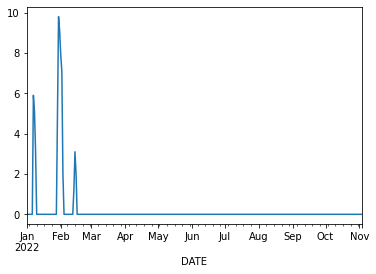

In [27]:
weather["snwd"].plot()

In [28]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5
DATE,,,,,,,,,,,,,
2022-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,1.22,0.0,0.0,50,53,48,190,200,15.0,18.1
2022-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.03,0.0,0.0,53,59,38,330,320,23.9,30.0
2022-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.00,0.0,0.0,34,39,22,350,360,30.0,36.9
2022-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,25,33,19,330,330,21.9,25.9
2022-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.29,0.0,0.0,36,46,30,250,230,16.1,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2.91,0.00,0.0,0.0,51,62,38,160,210,8.9,11.0
2022-10-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.08,0.0,0.0,56,64,49,190,190,13.0,15.0
2022-11-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.95,0.21,0.0,0.0,62,70,59,290,320,16.1,19.9


In [30]:
weather["target"] = weather.shift(-1)["tmax"]

In [31]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,,,
2022-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,1.22,0.0,0.0,50,53,48,190,200,15.0,18.1,59.0
2022-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.03,0.0,0.0,53,59,38,330,320,23.9,30.0,39.0
2022-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.00,0.0,0.0,34,39,22,350,360,30.0,36.9,33.0
2022-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,25,33,19,330,330,21.9,25.9,46.0
2022-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.29,0.0,0.0,36,46,30,250,230,16.1,19.9,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2.91,0.00,0.0,0.0,51,62,38,160,210,8.9,11.0,64.0
2022-10-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.08,0.0,0.0,56,64,49,190,190,13.0,15.0,70.0
2022-11-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.95,0.21,0.0,0.0,62,70,59,290,320,16.1,19.9,72.0


In [32]:
weather = weather.ffill()

In [33]:
weather

,station,name,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
DATE,,,,,,,,,,,,,,
2022-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",6.26,1.22,0.0,0.0,50,53,48,190,200,15.0,18.1,59.0
2022-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.74,0.03,0.0,0.0,53,59,38,330,320,23.9,30.0,39.0
2022-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",18.12,0.00,0.0,0.0,34,39,22,350,360,30.0,36.9,33.0
2022-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.00,0.0,0.0,25,33,19,330,330,21.9,25.9,46.0
2022-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.29,0.29,0.0,0.0,36,46,30,250,230,16.1,19.9,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-30,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",2.91,0.00,0.0,0.0,51,62,38,160,210,8.9,11.0,64.0
2022-10-31,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",5.82,0.08,0.0,0.0,56,64,49,190,190,13.0,15.0,70.0
2022-11-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.95,0.21,0.0,0.0,62,70,59,290,320,16.1,19.9,72.0


In [34]:
from sklearn.linear_model import Ridge

In [36]:
weather.corr()

,awnd,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,target
awnd,1.000000,0.180762,0.189545,0.010526,-0.279475,-0.300136,-0.301739,0.243082,0.185832,0.880086,0.872846,-0.339378
prcp,0.180762,1.000000,0.139262,0.000519,-0.116318,-0.165121,-0.076833,-0.200424,-0.264645,0.156718,0.188135,-0.128535
snow,0.189545,0.139262,1.000000,0.359594,-0.178333,-0.188570,-0.182807,0.086624,0.074926,0.144143,0.146585,-0.224853
snwd,0.010526,0.000519,0.359594,1.000000,-0.322490,-0.316355,-0.307182,0.078728,0.070438,0.000918,-0.009665,-0.281794
tavg,-0.279475,-0.116318,-0.178333,-0.322490,1.000000,0.983361,0.984781,-0.220776,-0.203828,-0.277236,-0.265088,0.902922
tmax,-0.300136,-0.165121,-0.188570,-0.316355,0.983361,1.000000,0.958642,-0.206192,-0.185585,-0.276188,-0.266278,0.903851
tmin,-0.301739,-0.076833,-0.182807,-0.307182,0.984781,0.958642,1.000000,-0.261623,-0.242842,-0.306139,-0.293419,0.916294
wdf2,0.243082,-0.200424,0.086624,0.078728,-0.220776,-0.206192,-0.261623,1.000000,0.881745,0.267143,0.249571,-0.287313
wdf5,0.185832,-0.264645,0.074926,0.070438,-0.203828,-0.185585,-0.242842,0.881745,1.000000,0.211341,0.202328,-0.260913
wsf2,0.880086,0.156718,0.144143,0.000918,-0.277236,-0.276188,-0.306139,0.267143,0.211341,1.000000,0.983494,-0.333107


In [ ]:
rr = Ridge(alpha=.1)